In [1]:
from PIL import Image

In [2]:
import matplotlib.pyplot as plt

In [16]:
import cv2

In [17]:
image = cv2.imread("Space.jpg")

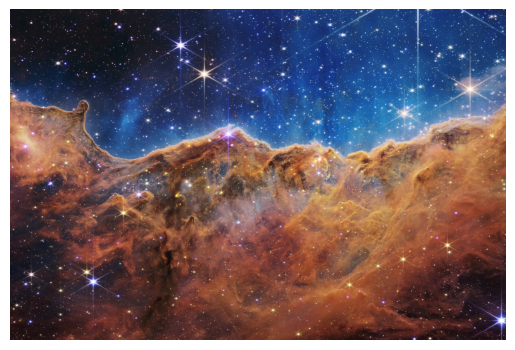

In [4]:
plt.imshow(image)
plt.axis("off")
plt.show()

In [5]:
import numpy as np

In [6]:
image_array = np.array(image)

In [18]:
resized_image = cv2.resize(image, (224, 224))

In [19]:
reshaped_image = resized_image.reshape((1, 224, 224, 3))


In [20]:
normalized_image = reshaped_image / 255.0


In [22]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions


In [10]:
model = ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 25s 0us/step


In [23]:
input_image = tf.image.resize(normalized_image, [224, 224])


In [24]:
input_image = preprocess_input(input_image)


In [25]:
predictions = model.predict(input_image)


1/1 [==============================] - 1s 1s/step


In [26]:
predicted_class = tf.argmax(predictions, axis=1)


In [27]:
class_index = predicted_class.numpy()[0]
class_name = decode_predictions(predictions, top=1)[0][0][1]
confidence = predictions[0][class_index]

35363/35363 [==============================] - 0s 1us/step


In [28]:
print("Tahmin edilen sınıf:", class_name)
print("Güven değeri:", confidence)
s

Tahmin edilen sınıf: web_site
Güven değeri: 0.05977709


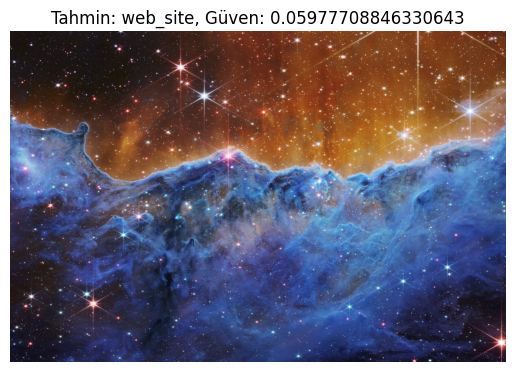

In [29]:
plt.imshow(image)
plt.axis("off")
plt.title(f"Tahmin: {class_name}, Güven: {confidence}")
plt.show()